# Import packages

In [45]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import time
from arch import arch_model
import pandas_datareader as pdr
import datetime as dt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [46]:
#定义绘图函数
def plot_cols(data,xlabel=None,ylabel=None,path_file=None,marker=True,len_xticks=10,save=False):
    """
    :param data:DataFrame,数据表格--行标题为横坐标，列标题为数据列
                Series,序列——行标题为横坐标，name为数据列
    :param xlabel: str,横坐标名称
    :param ylabel: str,纵坐标名称
    :param path_file: str,保存文件路径
    :param marker: bool,是否为每条线添加不同的标记
    :param len_xticks:int,横坐标显示的值个数
    :param save: bool,是否保存图片
    example:
        data=pd.DataFrame(np.random.random((100,3)),index=np.arange(100),columns=['a','b','c'])
        plot_cols(data,xlabel='指标',ylabel='指数')
    """
    data.index=data.index.astype(str)
    plt.figure(figsize=(12,8))
    markers=['.',',','o','v','^','<','>','1','2','3','4','s','p','*','h','H','+','x','D','d','|','_']#标记符号

    #如果是DataFrame表格形式，则画出多列；如果是Series，则画出单列
    if type(data) is pd.core.frame.DataFrame:
        #是否为每条线添加不同的符号
        if marker==False:
            for col in data.columns:
                plt.plot(data[col],marker='o',label=col)
        else:
            for col,marker_ in zip(data.columns,markers):
                plt.plot(data[col], marker=marker_, label=col)

    elif type(data) is pd.core.series.Series:
        plt.plot(data, marker='o', label=data.name)

    plt.legend(loc='best',fontsize='small')
    xticks=np.linspace(0,len(data),(len_xticks+1)).astype(int).tolist()[:-1]#被显示的横坐标刻度值的位置
    plt.xticks(data.index[xticks],rotation=270)
    plt.ylabel(ylabel,fontsize=15)
    plt.xlabel(xlabel,fontsize=15)
    plt.grid(True,alpha=0.2)
    if save==True:plt.savefig(path_file)

In [47]:
#修改目录
# path = "/Users/liu/Downloads"
# retval = os.getcwd()
# print(retval)

In [48]:

# os.chdir(path)
# print (os.path.abspath('.'))


In [125]:
rv_train

,index,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2,JYR,date_x
0,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08
1,2016-08-29,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,2016-08-29,2016-08
2,2016-08-30,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038,2016-08-30,2016-08
3,2016-08-31,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036,2016-08-31,2016-08
4,2016-09-01,0.000023,0.000037,0.000041,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034,2016-09-01,2016-09
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,2020-12-25,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094,0.000082,0.000104,0.000105,2020-12-25,2020-12
1054,2020-12-28,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094,2020-12-28,2020-12
1055,2020-12-29,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092,2020-12-29,2020-12
1056,2020-12-30,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085,2020-12-30,2020-12


# import data

In [50]:
#导入数据
MAC_CPI_MONTH = pd.read_csv("MAC_CPI_MONTH.csv",header=0)
# MAC_ECONOMIC_BOOM_IDX = pd.read_csv("MAC_ECONOMIC_BOOM_IDX.csv",header=0)
# MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX = pd.read_csv("MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX.csv",header=0)
MAC_INDUSTRY_GROWTH = pd.read_csv("MAC_INDUSTRY_GROWTH.csv",header=0)
MAC_LEND_RATE = pd.read_csv("MAC_LEND_RATE.csv",header=0)

In [51]:
mac=pd.read_csv('./中国_宏观202510.csv')
mac=mac[4:]
mac=mac.sort_values(by='指标名称')
mac['date']=mac['指标名称'].apply(lambda s:pd.to_datetime(s))
mac

,指标名称,中国:银行间同业拆借加权利率:7天,中国:CPI:当月同比,中国:CPI:环比,中国:消费者信心指数,中国:PPI:当月同比,date
5626,1987/1/31,NaN,5.1,NaN,NaN,NaN,1987-01-31
5617,1987/10/31,NaN,7.5,NaN,NaN,NaN,1987-10-31
5616,1987/11/30,NaN,8.3,NaN,NaN,NaN,1987-11-30
5615,1987/12/31,NaN,8.9,NaN,NaN,NaN,1987-12-31
5625,1987/2/28,NaN,5.4,NaN,NaN,NaN,1987-02-28
...,...,...,...,...,...,...,...
7,2025/9/30,1.4781,NaN,NaN,NaN,NaN,2025-09-30
26,2025/9/4,1.4737,NaN,NaN,NaN,NaN,2025-09-04
25,2025/9/5,1.468,NaN,NaN,NaN,NaN,2025-09-05
24,2025/9/8,1.4931,NaN,NaN,NaN,NaN,2025-09-08


In [128]:
mac=mac.fillna(method='ffill')
mac.columns

Index(['指标名称', '中国:银行间同业拆借加权利率:7天', '中国:CPI:当月同比', '中国:CPI:环比', '中国:消费者信心指数',
       '中国:PPI:当月同比', 'date'],
      dtype='object')

In [52]:
CPI_data=MAC_CPI_MONTH[MAC_CPI_MONTH['stat_month']>'2016-06']

In [53]:
MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX[MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX['stat_quarter']=='2016-06']

,id,stat_quarter,boom_idx,boom_idx_yoy,boom_idx_mom,confidence_idx,confidence_idx_yoy,confidence_idx_mom
3,4,2016-06,107.8,7.8,0.7,108.0,8.0,0.1


In [54]:
CPI_data=MAC_CPI_MONTH[MAC_CPI_MONTH['stat_month']>'2016-06']
CPI_data=CPI_data[['stat_month','cpi_month']][MAC_CPI_MONTH['area_code']==701001]
CPI_data=CPI_data.set_index('stat_month')
CPI_data.index=pd.to_datetime(CPI_data.index)
CPI_data=CPI_data.sort_values(by='stat_month')

In [55]:
df_CPI=CPI_data.resample('D').interpolate()

In [56]:
MAC_ECONOMIC_BOOM_IDX['stat_month']=pd.to_datetime(MAC_ECONOMIC_BOOM_IDX['stat_month'])
BOOM_data=MAC_ECONOMIC_BOOM_IDX.set_index('stat_month')
df_BOOM=BOOM_data.resample('D').interpolate()

In [57]:
del df_BOOM['id']

In [58]:
CONFIDENCE_data=MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX[MAC_ENTERPRISE_BOOM_CONFIDENCE_IDX['stat_quarter']>'2016-05']
CONFIDENCE_data=CONFIDENCE_data.set_index('stat_quarter')
CONFIDENCE_data.index=pd.to_datetime(CONFIDENCE_data.index)
df_CONFIDENCE=CONFIDENCE_data.resample('D').interpolate()
del df_CONFIDENCE['id']

<Axes: xlabel='stat_quarter'>

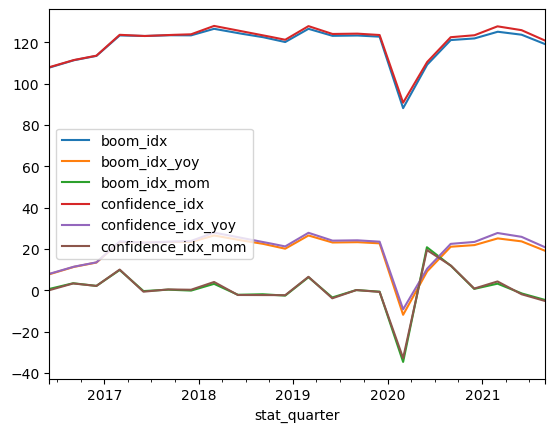

In [59]:
df_CONFIDENCE.plot()

In [60]:
INDUSTRY_GROWTH_data=MAC_INDUSTRY_GROWTH[MAC_INDUSTRY_GROWTH['stat_month']>'2016-04']
INDUSTRY_GROWTH_data=INDUSTRY_GROWTH_data.set_index('stat_month')
INDUSTRY_GROWTH_data.index=pd.to_datetime(INDUSTRY_GROWTH_data.index)
df_INDUSTRY_GROWTH=INDUSTRY_GROWTH_data.resample('D').interpolate()

In [61]:
del df_INDUSTRY_GROWTH['id']

In [62]:
df_LEND_RATE=MAC_LEND_RATE[['day','interest_rate']]

In [63]:
df_LEND_RATE=df_LEND_RATE.set_index('day')
df_LEND_RATE.index=pd.to_datetime(df_LEND_RATE.index)
df_LEND_RATE=df_LEND_RATE.sort_values(by='day')

In [64]:
MAC_data=pd.merge(df_LEND_RATE,df_INDUSTRY_GROWTH,right_index=True,left_index=True,how='outer')

In [65]:
MAC_data=pd.merge(df_CPI,MAC_data,right_index=True,left_index=True,how='outer')
MAC_data=pd.merge(df_CONFIDENCE,MAC_data,right_index=True,left_index=True,how='outer')
MAC_data=pd.merge(df_BOOM,MAC_data,right_index=True,left_index=True,how='outer')
MAC_data=MAC_data.dropna()

In [66]:
MAC_data

,early_warning_idx,consistency_idx,leading_idx,lagging_idx,boom_idx,boom_idx_yoy,boom_idx_mom,confidence_idx,confidence_idx_yoy,confidence_idx_mom,...,private_yoy,private_acc,collective_yoy,collective_acc,stock_cooperate_yoy,stock_cooperate_acc,joint_stock_yoy,joint_stock_acc,foreign_yoy,foreign_acc
2016-08-02,65.3,94.229677,99.140645,89.007742,110.158696,10.158696,2.586957,110.291304,10.291304,2.323913,...,6.496774,8.390323,-4.090323,1.280645,6.729032,7.277419,6.400000,6.996774,6.683871,3.909677
2016-08-03,65.3,94.229355,99.151290,89.015484,110.196739,10.196739,2.617391,110.328261,10.328261,2.359783,...,6.493548,8.380645,-4.080645,1.261290,6.558065,7.254839,6.400000,6.993548,6.667742,3.919355
2016-08-04,65.3,94.229032,99.161935,89.023226,110.234783,10.234783,2.647826,110.365217,10.365217,2.395652,...,6.490323,8.370968,-4.070968,1.241935,6.387097,7.232258,6.400000,6.990323,6.651613,3.929032
2016-08-05,65.3,94.228710,99.172581,89.030968,110.272826,10.272826,2.678261,110.402174,10.402174,2.431522,...,6.487097,8.361290,-4.061290,1.222581,6.216129,7.209677,6.400000,6.987097,6.635484,3.938710
2016-08-08,65.3,94.227742,99.204516,89.054194,110.386957,10.386957,2.769565,110.513043,10.513043,2.539130,...,6.477419,8.332258,-4.032258,1.164516,5.703226,7.141935,6.400000,6.977419,6.587097,3.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,70.7,99.109677,96.435484,97.930645,119.500000,19.500000,-4.391304,121.232609,21.232609,-4.884783,...,3.264516,13.409677,-1.400000,-1.200000,10.300000,1.000000,4.406452,12.232258,0.980645,11.929032
2021-08-27,70.7,99.058065,96.412903,97.943871,119.450000,19.450000,-4.426087,121.177174,21.177174,-4.920652,...,3.187097,13.358065,-1.400000,-1.200000,10.300000,1.000000,4.338710,12.193548,0.883871,11.874194
2021-08-30,70.7,98.903226,96.345161,97.983548,119.300000,19.300000,-4.530435,121.010870,21.010870,-5.028261,...,2.954839,13.203226,-1.400000,-1.200000,10.300000,1.000000,4.135484,12.077419,0.593548,11.709677
2021-08-31,70.7,98.851613,96.322581,97.996774,119.250000,19.250000,-4.565217,120.955435,20.955435,-5.064130,...,2.877419,13.151613,-1.400000,-1.200000,10.300000,1.000000,4.067742,12.038710,0.496774,11.654839


# Using 5-min data get daily RV

In [130]:
data=pd.read_csv('price_data.csv')
data

,Unnamed: 0,open,close,high,low,volume,money
0,2016-08-23 09:35:00,3332.62,3337.86,3338.73,3332.62,418825900.0,5.074230e+09
1,2016-08-23 09:40:00,3337.69,3343.05,3346.57,3337.69,365334500.0,4.337201e+09
2,2016-08-23 09:45:00,3342.91,3341.35,3343.41,3341.15,306801200.0,3.767201e+09
3,2016-08-23 09:50:00,3341.35,3343.32,3344.43,3341.22,283033100.0,3.367326e+09
4,2016-08-23 09:55:00,3343.57,3336.11,3343.57,3336.11,308091300.0,3.667284e+09
...,...,...,...,...,...,...,...
68971,2022-07-22 14:40:00,4239.30,4243.06,4249.00,4239.30,292845400.0,6.277088e+09
68972,2022-07-22 14:45:00,4242.93,4245.14,4248.93,4242.85,226255100.0,4.859623e+09
68973,2022-07-22 14:50:00,4245.18,4242.88,4245.80,4242.58,186620400.0,4.484079e+09
68974,2022-07-22 14:55:00,4242.80,4237.66,4242.80,4237.62,262714100.0,5.364592e+09


In [131]:
data['date']=data['Unnamed: 0']
data['JYR']=data['date'].apply(lambda x:x.split(' ')[0])
data['time']=data['date'].apply(lambda x:x.split(' ')[1])
df=data.drop(['Unnamed: 0', 'date'], axis=1)

In [132]:
data_time_date=pd.pivot_table(df,index=['time'],columns=['JYR'],values=['close'])['close']
data_time_date=data_time_date.loc[data['time'].unique(),:]

In [133]:
def RV_days_(days):
    RV_days=[]
    dates=[]
    for i in range(days,len(RV)):
        date=RV.index[i]
        RV_day=RV[i-days:i].sum()
        dates.append(date)
        RV_days.append(RV_day)
    RV_days=pd.Series(RV_days,index=dates)/days
    plot_cols(np.sqrt(RV_days),xlabel='日期',ylabel='{}days RV'.format(days),len_xticks=20,path_file='{}天度已实现波动率.png'.format(days))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


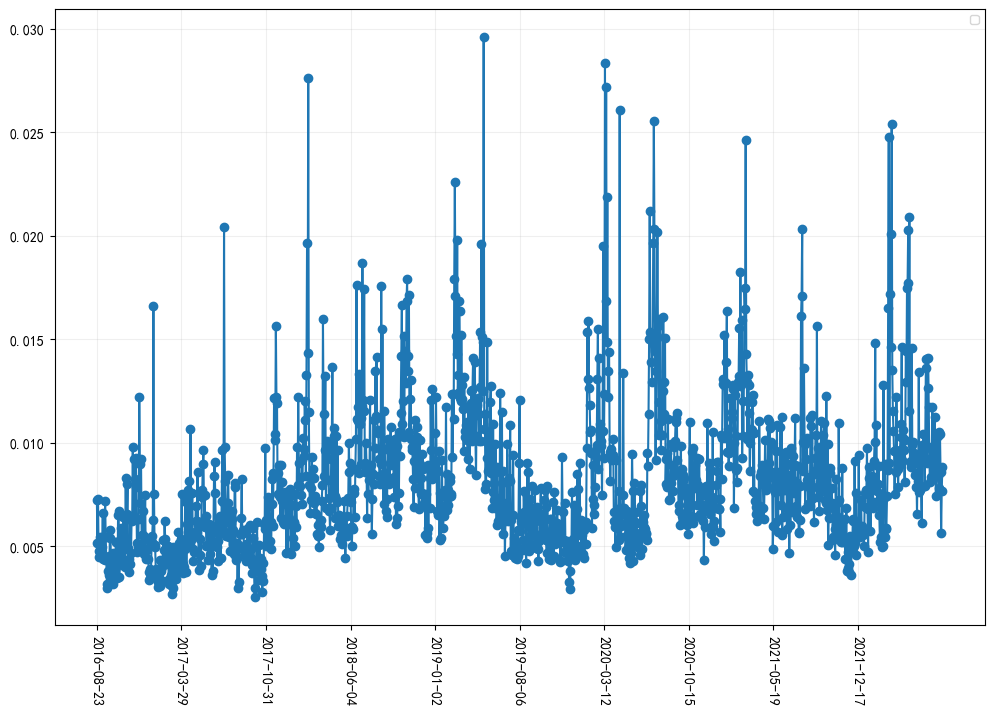

In [134]:
RV=((np.log(data_time_date)-np.log(data_time_date.shift())).dropna()**2).sum()#日度已实现方差
plot_cols(np.sqrt(RV))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


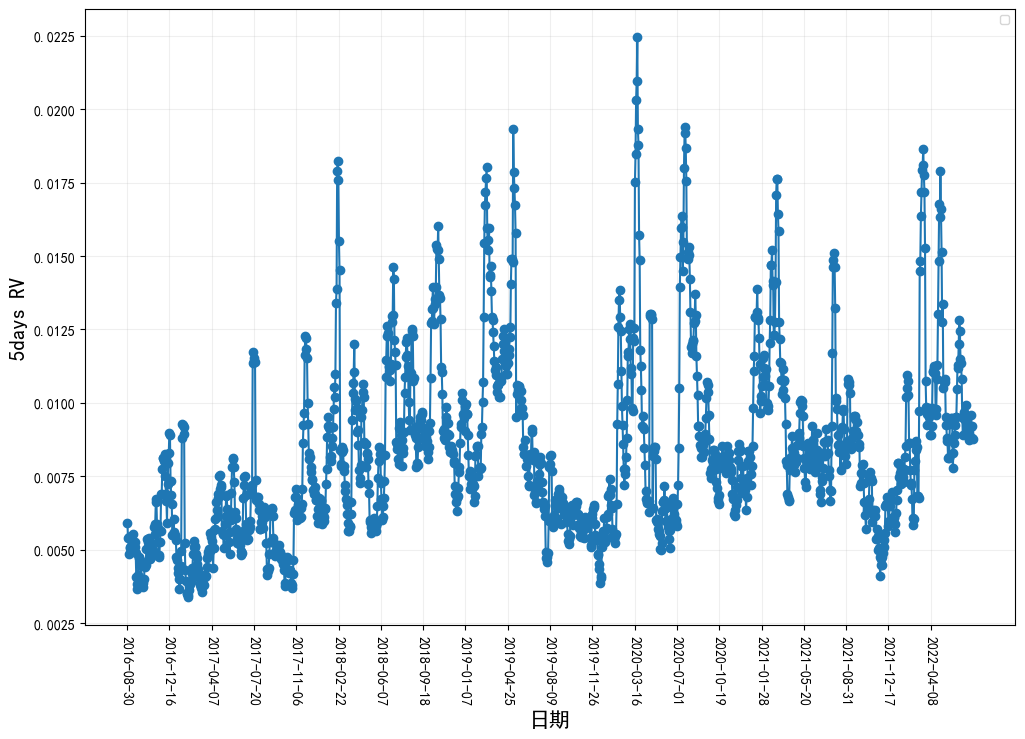

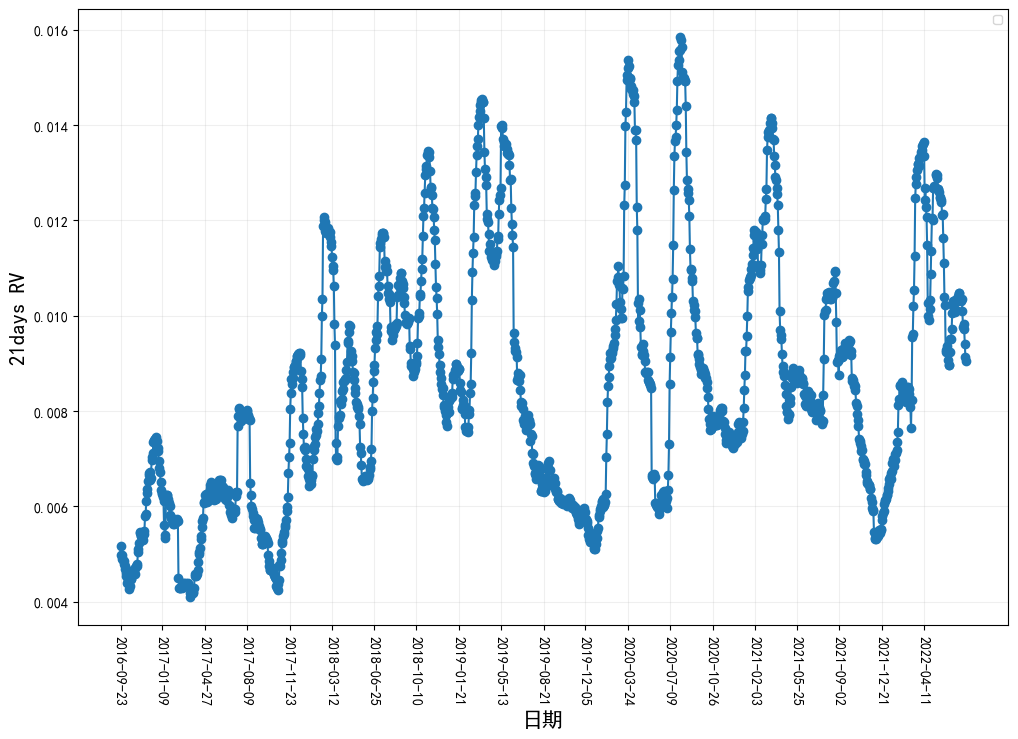

In [135]:
RV_days_(days=5)#计算周度已实现波动率并绘图
RV_days_(days=21)#计算月度已实现波动率并绘图

In [136]:
rv = RV.drop('2016-08-23').reset_index(name='Returns')

In [137]:
rv1=rv.set_index('JYR')

In [138]:
#导入日度数据
filename='daily_data.csv'
f=open(filename,'r')
price=pd.read_csv(filename,
                index_col=0,
                parse_dates=True)

<Axes: >

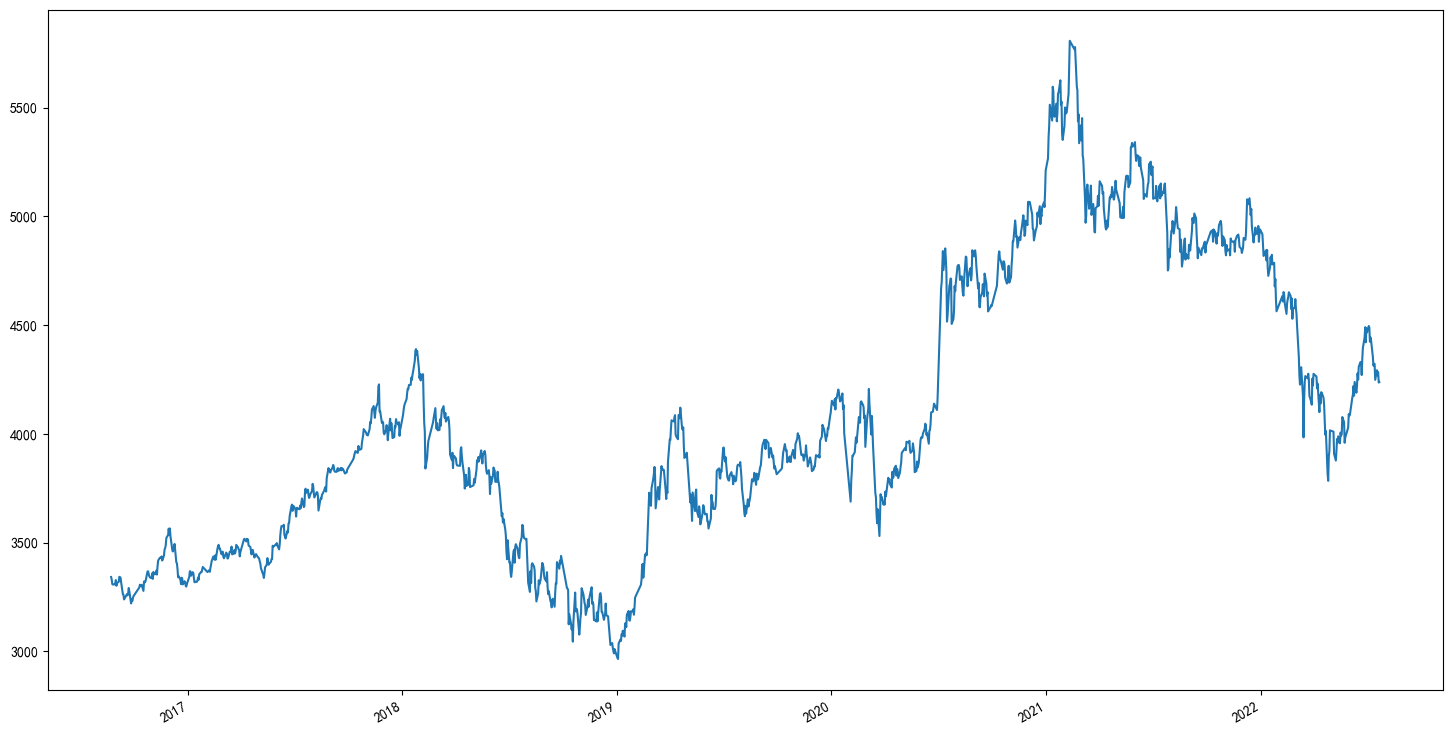

In [139]:
price['close'].plot()

In [140]:
ret=np.log(price['close']/price['close'].shift(1)).dropna()
ret[ret.index<pd.to_datetime('2021-01-01')]

2016-08-24   -0.003588
2016-08-25   -0.006293
2016-08-26   -0.000568
2016-08-29    0.000209
2016-08-30    0.001272
                ...   
2020-12-25    0.008363
2020-12-28    0.004433
2020-12-29   -0.004248
2020-12-30    0.013936
2020-12-31    0.018902
Name: close, Length: 1060, dtype: float64

# Test & Train

In [141]:
len(price)

1437

In [142]:
n = 500
split_date = ret.iloc[-n:].indexn = 500
split_date = ret.iloc[-n:].index

In [143]:
split_date

DatetimeIndex(['2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16',
               ...
               '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
               '2022-07-15', '2022-07-18', '2022-07-19', '2022-07-20',
               '2022-07-21', '2022-07-22'],
              dtype='datetime64[ns]', length=500, freq=None)

In [144]:
# ret_train=ret[:-len(split_date)]
# ret_test=ret[-len(split_date):]
ret_train=ret[:1060]
ret_test=ret[1060:]

In [145]:
rv1.index=pd.to_datetime(rv1.index)

In [146]:
n=1060
rv_train=rv1[:n]
rv_test=rv1[n:]

In [147]:
rv_train,rv_test, ret_train, ret_test

(             Returns
 JYR                 
 2016-08-24  0.000027
 2016-08-25  0.000053
 2016-08-26  0.000020
 2016-08-29  0.000023
 2016-08-30  0.000022
 ...              ...
 2020-12-25  0.000047
 2020-12-28  0.000046
 2020-12-29  0.000053
 2020-12-30  0.000032
 2020-12-31  0.000107
 
 [1060 rows x 1 columns],
              Returns
 JYR                 
 2021-01-04  0.000068
 2021-01-05  0.000104
 2021-01-06  0.000171
 2021-01-07  0.000165
 2021-01-08  0.000164
 ...              ...
 2022-07-18  0.000109
 2022-07-19  0.000074
 2022-07-20  0.000032
 2022-07-21  0.000059
 2022-07-22  0.000078
 
 [376 rows x 1 columns],
 2016-08-24   -0.003588
 2016-08-25   -0.006293
 2016-08-26   -0.000568
 2016-08-29    0.000209
 2016-08-30    0.001272
                 ...   
 2020-12-25    0.008363
 2020-12-28    0.004433
 2020-12-29   -0.004248
 2020-12-30    0.013936
 2020-12-31    0.018902
 Name: close, Length: 1060, dtype: float64,
 2021-01-04    0.010770
 2021-01-05    0.018951
 2021-01-06    0.

# GARCH

In [148]:
garch = arch_model(ret_train, mean='zero', vol='GARCH', p=1, o=0, q=1)\
                 .fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3318.16
Distribution:                  Normal   AIC:                          -6630.31
Method:            Maximum Likelihood   BIC:                          -6615.41
                                        No. Observations:                 1060
Date:                Mon, Oct 13 2025   Df Residuals:                     1060
Time:                        23:44:56   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7533e-06  4.109e-11  4.267e+04      0.000 [1.

In [149]:
bic_garch = []

for p in range(1, 5):
    for q in range(1, 5):
        garch = arch_model(ret_train, mean='AR',vol='GARCH', p=p, o=0, q=q)\
                 .fit(disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
garch = arch_model(ret_train, mean='zero', vol='GARCH',
                   p=best_param[0], o=0, q=best_param[1])\
         .fit(disp='off')
print(garch.summary())
forecast = garch.forecast(start='2016-08-23')
forecast_garch = forecast

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                3318.16
Distribution:                  Normal   AIC:                          -6630.31
Method:            Maximum Likelihood   BIC:                          -6615.41
                                        No. Observations:                 1060
Date:                Mon, Oct 13 2025   Df Residuals:                     1060
Time:                        23:44:57   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.7533e-06  4.109e-11  4.267e+04      0.000 [1.

In [150]:
out2=forecast_garch.variance

In [151]:
rmse_garch = np.sqrt(mse(rv_train,np.sqrt(forecast_garch.variance)))
print('The Insample RMSE value of GARCH model is {:.5f}'.format(rmse_garch))

The Insample RMSE value of GARCH model is 0.01222


In [152]:
rv_train.index

DatetimeIndex(['2016-08-24', '2016-08-25', '2016-08-26', '2016-08-29',
               '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02',
               '2016-09-05', '2016-09-06',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='JYR', length=1060, freq=None)

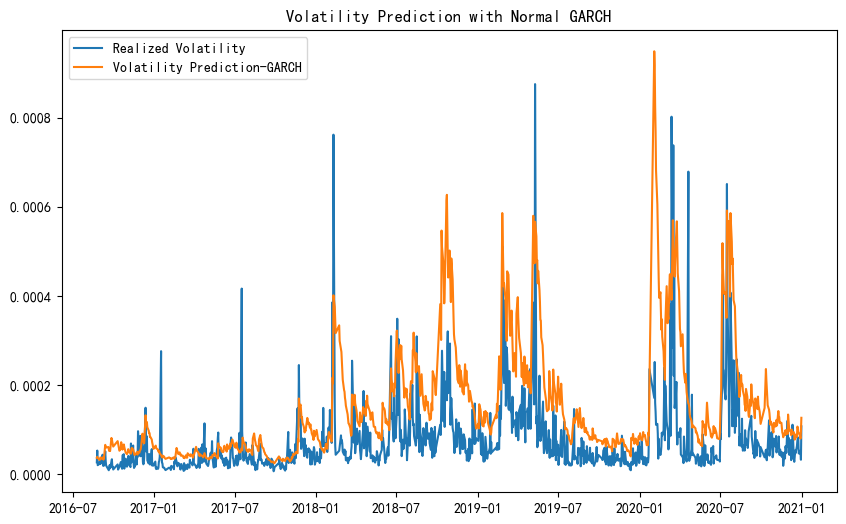

In [153]:
plt.figure(figsize=(10,6))
plt.plot(rv_train, label='Realized Volatility')
plt.plot(forecast_garch.variance,label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with Normal GARCH', fontsize=12)
plt.legend()
plt.show()

In [154]:
bic_gjr_garch = []

for p in range(1, 5):
    for q in range(1, 5):
        gjrgarch = arch_model(ret_train, mean='zero', p=p, o=1, q=q)\
                   .fit(disp='off')
        bic_gjr_garch.append(gjrgarch.bic)
        if gjrgarch.bic == np.min(bic_gjr_garch):
            best_param = p, q
gjrgarch = arch_model(ret_train,mean='zero', p=best_param[0], o=1,
                      q=best_param[1]).fit(disp='off')
print(gjrgarch.summary())
forecast = gjrgarch.forecast(start='2016-08-23')
forecast_gjrgarch = forecast

                     Zero Mean - GJR-GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:                3318.17
Distribution:                  Normal   AIC:                          -6628.34
Method:            Maximum Likelihood   BIC:                          -6608.47
                                        No. Observations:                 1060
Date:                Mon, Oct 13 2025   Df Residuals:                     1060
Time:                        23:45:00   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.7083e-06  9.250e-10   2927.947      0.000 [2.

g:\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [155]:
out3=forecast_gjrgarch.variance

In [156]:
rmse_gjrgarch = np.sqrt(mse(rv_train,np.sqrt(forecast_gjrgarch.variance)))
print('The Insample RMSE value of GJR-GARCH model is {:.5f}'.format(rmse_gjrgarch))

The Insample RMSE value of GJR-GARCH model is 0.01207


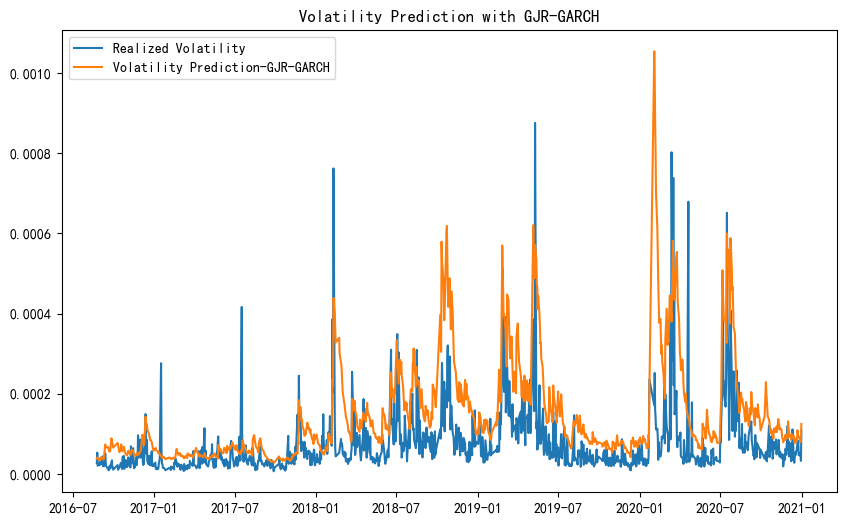

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(rv_train, label='Realized Volatility')
plt.plot(forecast_gjrgarch.variance,
         label='Volatility Prediction-GJR-GARCH')
plt.title('Volatility Prediction with GJR-GARCH', fontsize=12)
plt.legend()
plt.show()

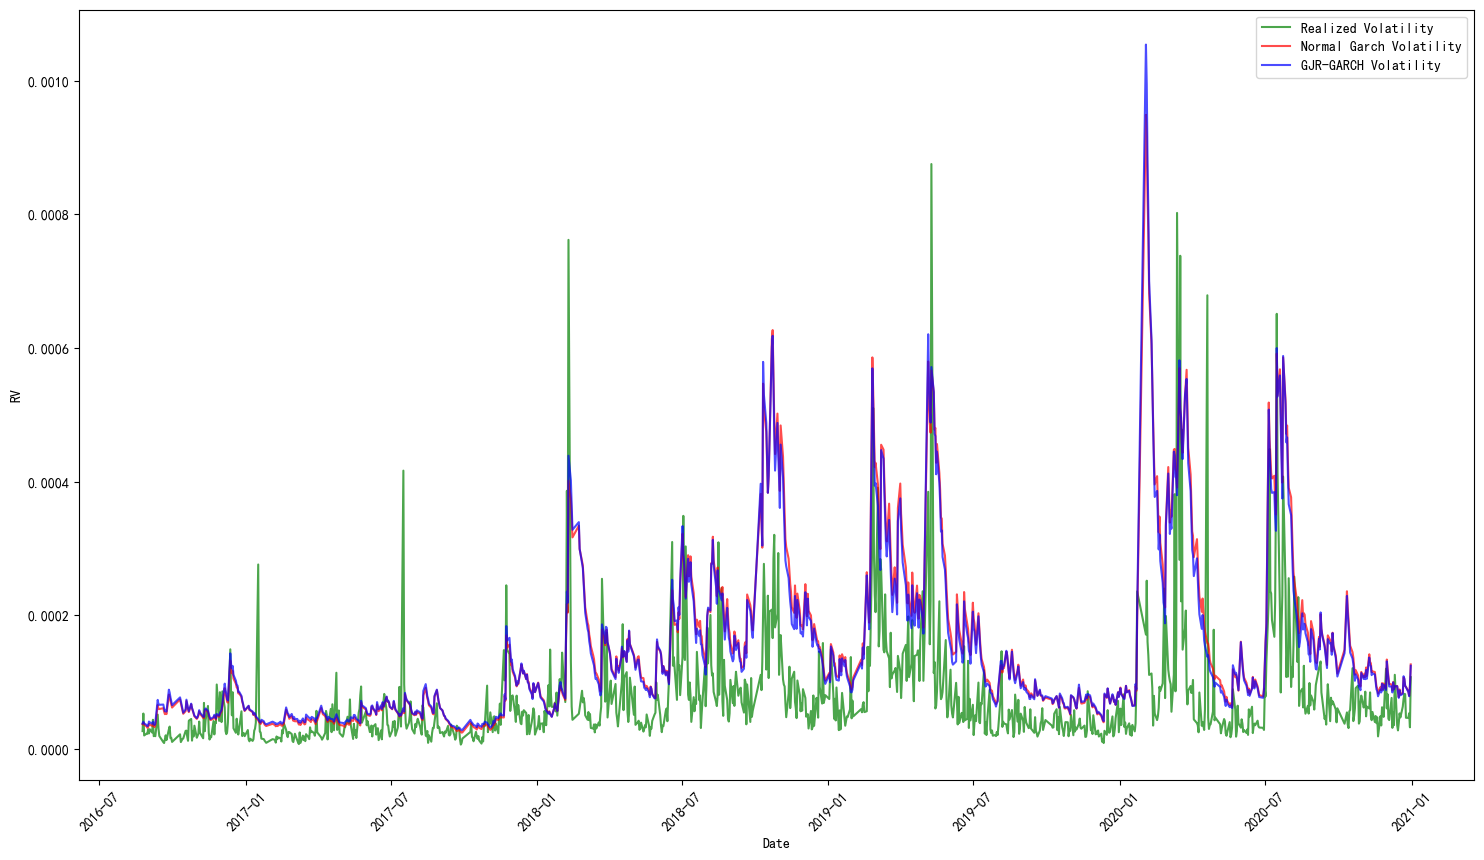

In [158]:
plt.plot(rv_train, color = 'green', label = 'Realized Volatility',alpha = 0.7)
plt.plot(out2, color = 'red', label = 'Normal Garch Volatility',alpha = 0.7)
plt.plot(out3, color = 'blue', label = 'GJR-GARCH Volatility',alpha = 0.7)
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['font.sans-serif'] = ['simhei'] #字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号 #时序图的绘制
plt.xticks(rotation=45) #坐标角度旋转
plt.xlabel('Date') #横、纵坐标以及标题命名
plt.ylabel('RV')
plt.legend(loc = 'upper right')
plt.show()

# 样本外预测 -Garch

In [159]:
y=ret_test[0]**2
forecast_vol=[]

In [160]:
for i in range(0,len(ret_test)):
    y = -2.6796e-06+0.1*ret_test[i]**2+0.88*y**2
    forecast_vol.append(y)

In [161]:
from pandas.core.frame import DataFrame

In [162]:
data2=rv_test

In [163]:
data2['forecast_garch']=forecast_vol

In [164]:
rmse_outsample_garch = np.sqrt(mse(data2['Returns'],data2['forecast_garch']))
print('The OutSample RMSE value of GARCH models is {:.5f}'.format(rmse_outsample_garch))

The OutSample RMSE value of GARCH models is 0.00011


In [165]:
ret_test

2021-01-04    0.010770
2021-01-05    0.018951
2021-01-06    0.009117
2021-01-07    0.017563
2021-01-08   -0.003312
                ...   
2022-07-18    0.010317
2022-07-19   -0.005431
2022-07-20    0.003381
2022-07-21   -0.011207
2022-07-22    0.000512
Name: close, Length: 376, dtype: float64

In [166]:
#GJR-GARCH样本外预测
y=ret_test[0]**2
forecast_vol_gjrgarch=[]

for i in range(0,len(ret_test)):
    if(ret_test[i]<0):
        N=1
    else:
        N=0
    y = 2.1333e-06+(0.0902+0.0604*N)*ret_test[i]**2+0.8751*y
    forecast_vol_gjrgarch.append(y)

In [167]:
data2['forecast_gjrgarch']=forecast_vol_gjrgarch

In [168]:
rmse_outsample_gjrgarch = np.sqrt(mse(data2['Returns'],data2['forecast_gjrgarch']))
print('The OutSample RMSE value of GARCH models is {:.5f}'.format(rmse_outsample_gjrgarch))

The OutSample RMSE value of GARCH models is 0.00012


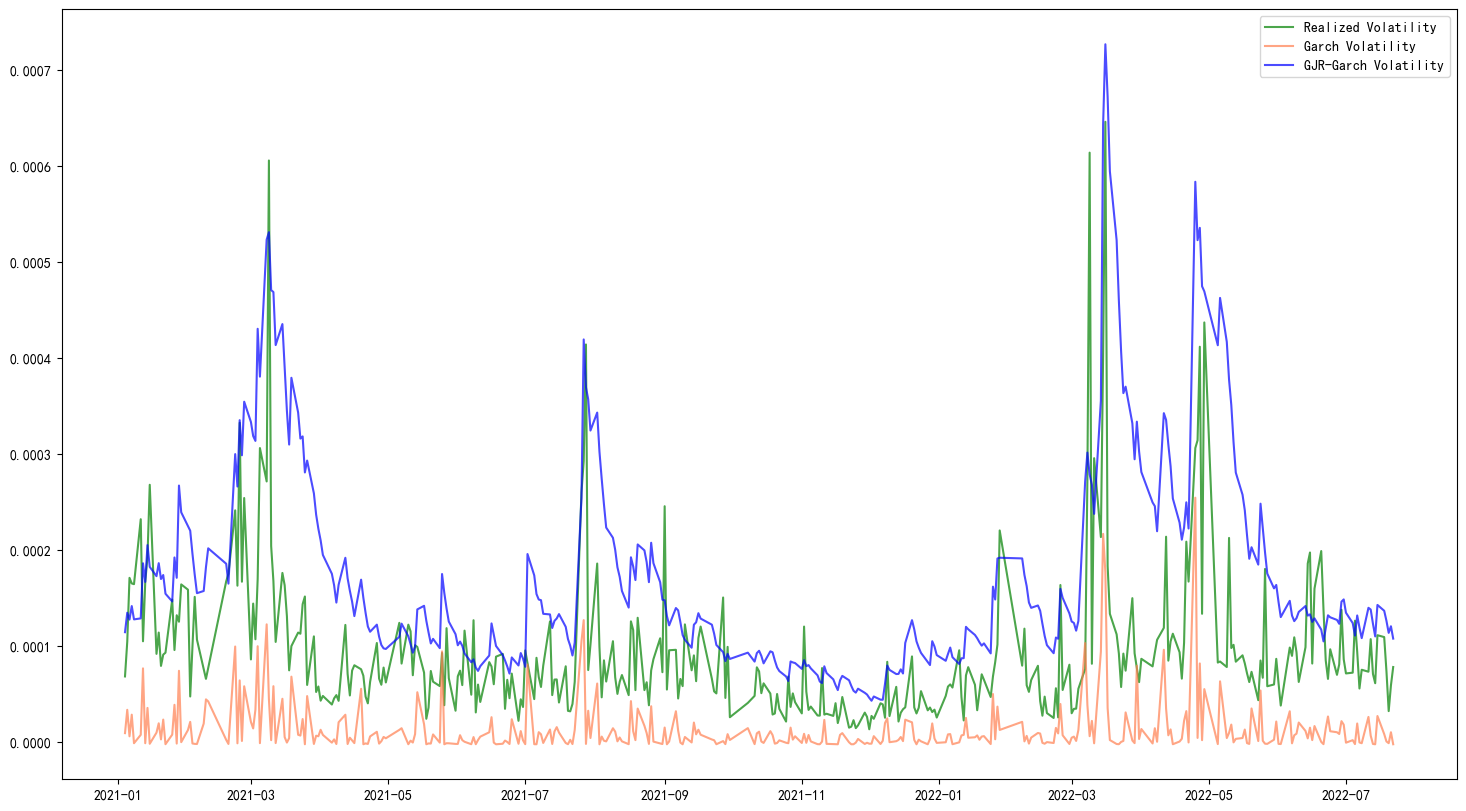

In [169]:
plt.plot(data2['Returns'], color = 'green', label = 'Realized Volatility',alpha = 0.7)
plt.plot(data2['forecast_garch'], color = 'coral', label = 'Garch Volatility',alpha = 0.7)
plt.plot(data2['forecast_gjrgarch'], color = 'blue', label = 'GJR-Garch Volatility',alpha = 0.7)
#plt.plot(data2['forecast_egarch'], color = 'red', label = 'EGarch Volatility',alpha = 0.7)

plt.legend(loc = 'upper right')

# LSTM

In [170]:
data2['RV_s1']=data2['Returns'].shift(1)

data2['garch_s1']=data2['forecast_garch'].shift(1)
data2['gjrgarch_s1']=data2['forecast_gjrgarch'].shift(1)
data2['RV_s2']=data2['Returns'].shift(2)
data2['garch_s2']=data2['forecast_garch'].shift(2)
data2['gjrgarch_s2']=data2['forecast_gjrgarch'].shift(2)
data2.rename(columns={'Returns':'RV'},inplace=True)

In [171]:
data2=data2.dropna()

In [172]:
data2.reset_index()

,JYR,RV,forecast_garch,forecast_gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2
0,2021-01-06,0.000171,5.633877e-06,0.000127,0.000104,3.323416e-05,0.000134,0.000068,8.931973e-06,0.000114
1,2021-01-07,0.000165,2.816568e-05,0.000141,0.000171,5.633877e-06,0.000127,0.000104,3.323416e-05,0.000134
2,2021-01-08,0.000164,-1.582092e-06,0.000127,0.000165,2.816568e-05,0.000141,0.000171,5.633877e-06,0.000127
3,2021-01-11,0.000232,7.170100e-06,0.000128,0.000164,-1.582092e-06,0.000127,0.000165,2.816568e-05,0.000141
4,2021-01-12,0.000105,7.640697e-05,0.000186,0.000232,7.170100e-06,0.000128,0.000164,-1.582092e-06,0.000127
...,...,...,...,...,...,...,...,...,...,...
369,2022-07-18,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,0.000142,0.000061,-2.677603e-06,0.000110
370,2022-07-19,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,0.000142
371,2022-07-20,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,0.000136
372,2022-07-21,0.000059,9.879805e-06,0.000120,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,0.000126


In [173]:
data3

,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2
2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038
2016-08-29,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041
2016-08-30,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038
2016-08-31,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036
2016-09-01,0.000023,0.000037,0.000041,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034
...,...,...,...,...,...,...,...,...,...
2020-12-25,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094,0.000082,0.000104,0.000105
2020-12-28,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094
2020-12-29,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092
2020-12-30,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085


In [174]:
data3=pd.concat([rv_train,out2,out3],axis=1)
data3.columns=['RV','garch','gjrgarch']

In [175]:
data3['RV_s1']=data3['RV'].shift(1)
data3['garch_s1']=data3['garch'].shift(1)
data3['gjrgarch_s1']=data3['gjrgarch'].shift(1)
data3['RV_s2']=data3['RV'].shift(2)
data3['garch_s2']=data3['garch'].shift(2)
data3['gjrgarch_s2']=data3['gjrgarch'].shift(2)
data3=data3.dropna()

In [176]:
X_train_1=data3
X_test_1=data2

In [177]:
X_train_1

,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2
2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038
2016-08-29,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041
2016-08-30,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038
2016-08-31,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036
2016-09-01,0.000023,0.000037,0.000041,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034
...,...,...,...,...,...,...,...,...,...
2020-12-25,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094,0.000082,0.000104,0.000105
2020-12-28,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094
2020-12-29,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092
2020-12-30,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085


In [184]:
merge=mac[['中国:银行间同业拆借加权利率:7天', '中国:CPI:当月同比', '中国:CPI:环比', '中国:消费者信心指数',
       '中国:PPI:当月同比','date']].copy()
merge['date']=merge['date'].apply(lambda s:s.strftime("%Y-%m-%d"))
merge['date']=merge['date'].apply(lambda s:s[:7])
merge['date']

5626    1987-01
5617    1987-10
5616    1987-11
5615    1987-12
5625    1987-02
         ...   
7       2025-09
26      2025-09
25      2025-09
24      2025-09
23      2025-09
Name: date, Length: 5623, dtype: object

In [186]:
rv_test=data2.reset_index()

rv_test['JYR']=rv_test['JYR'].apply(lambda s:s.strftime("%Y-%m-%d"))
rv_test['date']=rv_test['JYR'].apply(lambda s:s[:7])
rv_test=rv_test.merge(merge,on='date')
rv_test.rename(columns={'forecast_garch':'garch','forecast_gjrgarch':'gjrgarch'},inplace=True)
rv_test

,JYR,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2,date,中国:银行间同业拆借加权利率:7天,中国:CPI:当月同比,中国:CPI:环比,中国:消费者信心指数,中国:PPI:当月同比
0,2021-01-06,0.000171,0.000006,0.000127,0.000104,0.000033,0.000134,0.000068,0.000009,0.000114,2021-01,2.5872,1.7,0.2,120.5,-2.1
1,2021-01-06,0.000171,0.000006,0.000127,0.000104,0.000033,0.000134,0.000068,0.000009,0.000114,2021-01,2.2187,1.7,0.2,120.5,-2.1
2,2021-01-06,0.000171,0.000006,0.000127,0.000104,0.000033,0.000134,0.000068,0.000009,0.000114,2021-01,2.486,1.7,0.2,120.5,-2.1
3,2021-01-06,0.000171,0.000006,0.000127,0.000104,0.000033,0.000134,0.000068,0.000009,0.000114,2021-01,2.1678,1.7,0.2,120.5,-2.1
4,2021-01-06,0.000171,0.000006,0.000127,0.000104,0.000033,0.000134,0.000068,0.000009,0.000114,2021-01,2.27,1.7,0.2,120.5,-2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7942,2022-07-22,0.000078,-0.000003,0.000107,0.000059,0.000010,0.000120,0.000032,-0.000002,0.000113,2022-07,1.8186,2.7,0.5,87.9,4.2
7943,2022-07-22,0.000078,-0.000003,0.000107,0.000059,0.000010,0.000120,0.000032,-0.000002,0.000113,2022-07,1.8571,2.7,0.5,87.9,4.2
7944,2022-07-22,0.000078,-0.000003,0.000107,0.000059,0.000010,0.000120,0.000032,-0.000002,0.000113,2022-07,1.8411,2.7,0.5,87.9,4.2
7945,2022-07-22,0.000078,-0.000003,0.000107,0.000059,0.000010,0.000120,0.000032,-0.000002,0.000113,2022-07,2.068,2.7,0.5,87.9,4.2


In [188]:
rv_train=data3.reset_index()


rv_train['JYR']=rv_train['index'].apply(lambda s:s.strftime("%Y-%m-%d"))
rv_train['date']=rv_train['JYR'].apply(lambda s:s[:7])
rv_train=rv_train.merge(merge,on='date')
rv_train


,index,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2,JYR,date,中国:银行间同业拆借加权利率:7天,中国:CPI:当月同比,中国:CPI:环比,中国:消费者信心指数,中国:PPI:当月同比
0,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08,2.4016,1.765113,0.194549,106.8,-1.7
1,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08,2.4437,1.765113,0.194549,106.8,-1.7
2,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08,2.5776,1.765113,0.194549,106.8,-1.7
3,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08,2.501,1.765113,0.194549,106.8,-1.7
4,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038,2016-08-26,2016-08,2.4407,1.765113,0.194549,106.8,-1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22508,2020-12-31,0.000107,0.000126,0.000124,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,2020-12-31,2020-12,2.5525,0.2,0.7,122.1,-0.4
22509,2020-12-31,0.000107,0.000126,0.000124,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,2020-12-31,2020-12,2.5531,0.2,0.7,122.1,-0.4
22510,2020-12-31,0.000107,0.000126,0.000124,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,2020-12-31,2020-12,2.2812,0.2,0.7,122.1,-0.4
22511,2020-12-31,0.000107,0.000126,0.000124,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,2020-12-31,2020-12,2.3642,0.2,0.7,122.1,-0.4


In [592]:
rv_train.columns

Index(['index', 'RV', 'garch', 'gjrgarch', 'RV_s1', 'garch_s1', 'gjrgarch_s1',
       'RV_s2', 'garch_s2', 'gjrgarch_s2', 'JYR', 'date_x',
       '中国:固定资产投资完成额:累计同比', '中国:固定资产投资完成额:制造业:累计同比', '中国:工业增加值:金属制品业:累计同比',
       '中国:工业增加值:金属制品业:当月同比', '中国:工业增加值:通用设备制造业:当月同比', '中国:工业增加值:通用设备制造业:累计同比',
       '中国:工业增加值:专用设备制造业:当月同比', '中国:工业增加值:专用设备制造业:累计同比', '中国:产量:工业锅炉:当月同比',
       '中国:产量:工业锅炉:累计同比', '中国:产量:金属切削机床:累计同比', '中国:产量:金属切削机床:当月同比',
       '中国:产量:汽车:当月同比', '中国:产量:汽车:累计同比', 'ppi_yoy'],
      dtype='object')

In [189]:
# Normalize the dataset 
# del rv_train['date_x']
# del rv_test['date_x']
X_train=(X_train_1-X_train_1.mean())/X_train_1.std()
X_test=(X_test_1-X_test_1.mean())/X_test_1.std()
X_train=rv_train.copy()
X_test=rv_test.copy()

In [190]:
y_test =rv_test['RV'].values
y_train = rv_train['RV'].values 

In [119]:
rv_test

,JYR,RV,forecast_garch,forecast_gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2,date_x
0,2021-01-06,0.000171,5.633877e-06,0.000127,0.000104,3.323416e-05,0.000134,0.000068,8.931973e-06,0.000114,2021-01
1,2021-01-07,0.000165,2.816568e-05,0.000141,0.000171,5.633877e-06,0.000127,0.000104,3.323416e-05,0.000134,2021-01
2,2021-01-08,0.000164,-1.582092e-06,0.000127,0.000165,2.816568e-05,0.000141,0.000171,5.633877e-06,0.000127,2021-01
3,2021-01-11,0.000232,7.170100e-06,0.000128,0.000164,-1.582092e-06,0.000127,0.000165,2.816568e-05,0.000141,2021-01
4,2021-01-12,0.000105,7.640697e-05,0.000186,0.000232,7.170100e-06,0.000128,0.000164,-1.582092e-06,0.000127,2021-01
...,...,...,...,...,...,...,...,...,...,...,...
369,2022-07-18,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,0.000142,0.000061,-2.677603e-06,0.000110,2022-07
370,2022-07-19,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,0.000142,2022-07
371,2022-07-20,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,0.000136,2022-07
372,2022-07-21,0.000059,9.879805e-06,0.000120,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,0.000126,2022-07


In [196]:
col=[ 'RV_s1', 'garch_s1', 'gjrgarch_s1',
       'RV_s2', 'garch_s2', 'gjrgarch_s2', 'garch', 'gjrgarch','中国:银行间同业拆借加权利率:7天', '中国:CPI:当月同比', '中国:CPI:环比', '中国:消费者信心指数',
       '中国:PPI:当月同比']
for s in col:
    X_train[s]=X_train[s].astype(float)
    X_test[s]=X_test[s].astype(float)
X_train_lstm=X_train[col].values.reshape(X_train[col].shape[0],X_train[col].shape[1],1)
X_test_1_lstm=X_test[col].values.reshape(X_test[col].shape[0],X_test[col].shape[1],1)
X_train_lstm.shape,X_test_1_lstm.shape

((22513, 13, 1), (7947, 13, 1))

In [197]:
import tensorflow
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

In [198]:
model = keras.Sequential()
model.add(layers.LSTM(10, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(layers.LSTM(10, return_sequences=False))
model.add(layers.Dense(5))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 13, 10)         │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,381 (5.39 KB)

 Trainable params: 1,381 (5.39 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, batch_size= 3, epochs=100,validation_split=0.5)

Epoch 1/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 1.8424e-04 - val_loss: 1.0402e-05
Epoch 2/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.6516e-06 - val_loss: 1.0286e-05
Epoch 3/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.0381e-06 - val_loss: 2.3966e-06
Epoch 4/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.0005e-06 - val_loss: 1.3502e-06
Epoch 5/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 4.2666e-07 - val_loss: 1.1594e-06
Epoch 6/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 5.2935e-07 - val_loss: 1.4670e-06
Epoch 7/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 4.3718e-07 - val_loss: 3.0040e-07
Epoch 8/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 2.7067e-07 - val_loss: 2.9167e-07
Epoch 9/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 2.0175e-07 - val_loss: 1.3246e-07
Epoch 10/100
3752/3752 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 1.2699e-07 - val_loss: 7.1329e-08
Epoch 11/100
3752/3

In [200]:
predictions = model.predict(X_test_1_lstm)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


9.31069379402893e-06

In [201]:
predictions

array([[7.4237076e-05],
       [7.4224998e-05],
       [7.4217882e-05],
       ...,
       [8.4289873e-05],
       [8.4602652e-05],
       [8.4216190e-05]], dtype=float32)

In [623]:
y_test_1

2      0.000449
3      0.000236
4      0.000233
5      0.000193
6      0.000168
         ...   
456    0.000109
457    0.000074
458    0.000032
459    0.000059
460    0.000078
Name: Returns, Length: 459, dtype: float64

In [605]:
import pandas as pd

d=pd.read_csv('model_data.csv')
d

,Unnamed: 0,early_warning_idx,consistency_idx,leading_idx,lagging_idx,boom_idx,boom_idx_yoy,boom_idx_mom,confidence_idx,confidence_idx_yoy,...,private_yoy,private_acc,collective_yoy,collective_acc,stock_cooperate_yoy,stock_cooperate_acc,joint_stock_yoy,joint_stock_acc,foreign_yoy,foreign_acc
0,2016-08-02,65.3,94.229677,99.140645,89.007742,110.158696,10.158696,2.586957,110.291304,10.291304,...,6.496774,8.390323,-4.090323,1.280645,6.729032,7.277419,6.400000,6.996774,6.683871,3.909677
1,2016-08-03,65.3,94.229355,99.151290,89.015484,110.196739,10.196739,2.617391,110.328261,10.328261,...,6.493548,8.380645,-4.080645,1.261290,6.558065,7.254839,6.400000,6.993548,6.667742,3.919355
2,2016-08-04,65.3,94.229032,99.161935,89.023226,110.234783,10.234783,2.647826,110.365217,10.365217,...,6.490323,8.370968,-4.070968,1.241935,6.387097,7.232258,6.400000,6.990323,6.651613,3.929032
3,2016-08-05,65.3,94.228710,99.172581,89.030968,110.272826,10.272826,2.678261,110.402174,10.402174,...,6.487097,8.361290,-4.061290,1.222581,6.216129,7.209677,6.400000,6.987097,6.635484,3.938710
4,2016-08-08,65.3,94.227742,99.204516,89.054194,110.386957,10.386957,2.769565,110.513043,10.513043,...,6.477419,8.332258,-4.032258,1.164516,5.703226,7.141935,6.400000,6.977419,6.587097,3.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2021-08-26,70.7,99.109677,96.435484,97.930645,119.500000,19.500000,-4.391304,121.232609,21.232609,...,3.264516,13.409677,-1.400000,-1.200000,10.300000,1.000000,4.406452,12.232258,0.980645,11.929032
1266,2021-08-27,70.7,99.058065,96.412903,97.943871,119.450000,19.450000,-4.426087,121.177174,21.177174,...,3.187097,13.358065,-1.400000,-1.200000,10.300000,1.000000,4.338710,12.193548,0.883871,11.874194
1267,2021-08-30,70.7,98.903226,96.345161,97.983548,119.300000,19.300000,-4.530435,121.010870,21.010870,...,2.954839,13.203226,-1.400000,-1.200000,10.300000,1.000000,4.135484,12.077419,0.593548,11.709677
1268,2021-08-31,70.7,98.851613,96.322581,97.996774,119.250000,19.250000,-4.565217,120.955435,20.955435,...,2.877419,13.151613,-1.400000,-1.200000,10.300000,1.000000,4.067742,12.038710,0.496774,11.654839


In [606]:
d.describe()

,early_warning_idx,consistency_idx,leading_idx,lagging_idx,boom_idx,boom_idx_yoy,boom_idx_mom,confidence_idx,confidence_idx_yoy,confidence_idx_mom,...,private_yoy,private_acc,collective_yoy,collective_acc,stock_cooperate_yoy,stock_cooperate_acc,joint_stock_yoy,joint_stock_acc,foreign_yoy,foreign_acc
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,...,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,71.115661,98.757529,101.133650,96.683353,119.947952,19.947952,0.673344,121.037392,21.037392,0.750467,...,6.890340,7.449649,-1.382988,-0.802130,5.455632,0.224435,6.734733,6.851539,5.174797,5.153142
std,1.867998,6.407908,2.365511,3.245532,7.468039,7.468039,7.558002,7.358423,7.358423,7.302986,...,2.532292,8.223411,2.242847,0.896739,6.231621,2.675422,1.801498,6.532153,3.320325,8.706589
min,65.300000,85.868966,96.300000,89.007742,88.443880,-11.556120,-33.980214,91.070246,-8.929754,-32.173860,...,-0.332967,-19.586207,-11.700000,-2.300000,-10.600000,-10.721429,-0.064516,-13.800000,-5.175824,-20.924138
25%,70.700000,94.340968,99.625363,92.804113,120.240985,20.240985,-1.825334,121.431447,21.431447,-2.103816,...,5.487903,5.900000,-1.400000,-1.200000,2.007258,-0.458710,6.162097,6.548790,3.192742,1.362097
50%,70.700000,98.349032,100.585000,97.971333,123.153804,23.153804,0.332813,123.615301,23.615301,0.468889,...,6.508172,6.600000,-1.400000,-1.200000,10.300000,1.000000,6.641935,6.800000,5.470484,5.317742
75%,70.700000,101.875677,103.257833,98.970887,123.702488,23.702488,3.040844,125.010326,25.010326,3.326746,...,7.490000,8.234677,-1.400000,-0.510484,10.300000,1.000000,7.162885,7.063226,6.905000,6.754839
max,76.000000,116.900000,105.831613,100.215484,126.600000,26.600000,20.900600,128.000000,28.000000,19.554200,...,16.800000,43.800000,3.900000,1.900000,10.300000,7.277419,13.400000,34.200000,17.400000,41.400000


In [607]:
X_train_1.reset_index()
rv_train=X_train_1.reset_index()
rv_train.rename(columns={'index':'JYR'},inplace=True)
rv_train['JYR']=rv_train['JYR'].apply(lambda s:s.strftime("%Y-%m-%d"))
rv_train

,JYR,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2
0,2016-08-26,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041,0.000027,0.000037,0.000038
1,2016-08-29,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038,0.000053,0.000039,0.000041
2,2016-08-30,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036,0.000020,0.000036,0.000038
3,2016-08-31,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034,0.000023,0.000034,0.000036
4,2016-09-01,0.000023,0.000037,0.000041,0.000030,0.000032,0.000035,0.000022,0.000032,0.000034
...,...,...,...,...,...,...,...,...,...,...
1053,2020-12-25,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094,0.000082,0.000104,0.000105
1054,2020-12-28,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092,0.000082,0.000094,0.000094
1055,2020-12-29,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085,0.000047,0.000093,0.000092
1056,2020-12-30,0.000032,0.000095,0.000093,0.000053,0.000080,0.000079,0.000046,0.000086,0.000085


In [608]:
rv_test=X_test.reset_index()
# rv_test.rename(columns={'index':'JYR'},inplace=True)
# rv_test['JYR']=rv_test['JYR'].apply(lambda s:s.strftime("%Y-%m-%d"))
rv_test


,index,JYR,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,...,中国:工业增加值:通用设备制造业:累计同比,中国:工业增加值:专用设备制造业:当月同比,中国:工业增加值:专用设备制造业:累计同比,中国:产量:工业锅炉:当月同比,中国:产量:工业锅炉:累计同比,中国:产量:金属切削机床:累计同比,中国:产量:金属切削机床:当月同比,中国:产量:汽车:当月同比,中国:产量:汽车:累计同比,ppi_yoy
0,0,2021-02-01,0.000158,1.220268e-05,0.000225,0.000164,-4.716346e-07,0.000239,0.000125,7.388026e-05,...,62.4,8.7,59.2,13.4,59.0,85.4,32.4,6.5,89.9,1.7
1,1,2021-02-02,0.000047,2.068094e-05,0.000220,0.000158,1.220268e-05,0.000225,0.000164,-4.716346e-07,...,62.4,8.7,59.2,13.4,59.0,85.4,32.4,6.5,89.9,1.7
2,2,2021-02-03,0.000100,-1.842453e-06,0.000196,0.000047,2.068094e-05,0.000220,0.000158,1.220268e-05,...,62.4,8.7,59.2,13.4,59.0,85.4,32.4,6.5,89.9,1.7
3,3,2021-02-04,0.000151,-2.258083e-06,0.000174,0.000100,-1.842453e-06,0.000196,0.000047,2.068094e-05,...,62.4,8.7,59.2,13.4,59.0,85.4,32.4,6.5,89.9,1.7
4,4,2021-02-05,0.000106,-2.381448e-06,0.000155,0.000151,-2.258083e-06,0.000174,0.000100,-1.842453e-06,...,62.4,8.7,59.2,13.4,59.0,85.4,32.4,6.5,89.9,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,332,2022-07-18,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,0.000142,0.000061,-2.677603e-06,...,-2.2,4.0,4.1,30.3,-0.3,-10.1,-14.8,31.5,2.9,4.2
333,333,2022-07-19,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,0.000136,0.000111,2.677182e-05,...,-2.2,4.0,4.1,30.3,-0.3,-10.1,-14.8,31.5,2.9,4.2
334,334,2022-07-20,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,0.000126,0.000109,7.965574e-06,...,-2.2,4.0,4.1,30.3,-0.3,-10.1,-14.8,31.5,2.9,4.2
335,335,2022-07-21,0.000059,9.879805e-06,0.000120,0.000032,-1.536337e-06,0.000113,0.000074,2.700665e-07,...,-2.2,4.0,4.1,30.3,-0.3,-10.1,-14.8,31.5,2.9,4.2


In [202]:
rv_test['lstm']=predictions
rv_test['date']=rv_test['JYR']
# rv_test['RV']=rv_test['Returns']
rv_test
rv_test['date']=pd.to_datetime(rv_test['date'])

In [610]:
rv_test.to_csv('./output/predRV.csv')

### 绘图

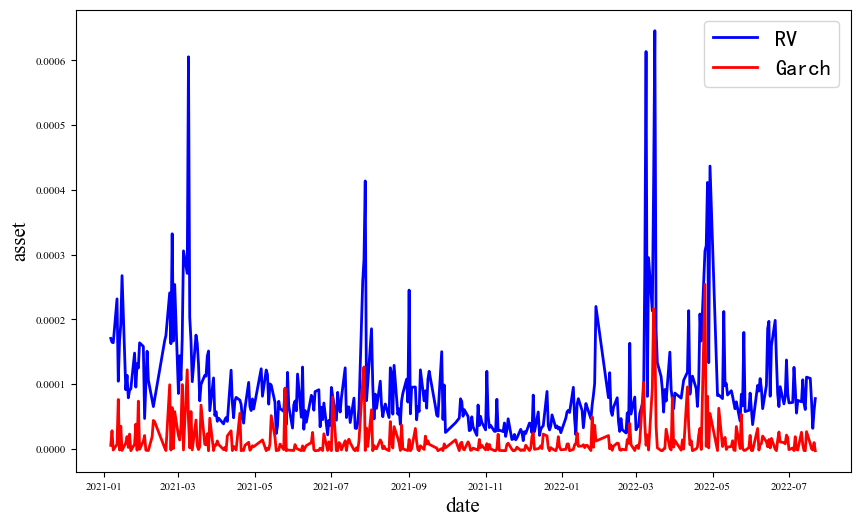

In [203]:

import  matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号
# plt.plot(data33.precision,data33.recall)
#设置输出的图片大小
figsize = 10,6
figure, ax = plt.subplots(figsize=figsize)
 
#在同一幅图片上画两条折线
A,=plt.plot(rv_test['date'],rv_test['RV'],'-b',label=u'RV',linewidth=2.0)
B,=plt.plot(rv_test['date'],rv_test['garch'],'-r',label=u'garch',linewidth=2.0)

# B,=plt.subplot(122,data33.recall,data33.precision,'-b',label=u'il=0',linewidth=5.0)
# B,=plt.scatter(data33.recall,data33.precision,'-r')
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
# font = {'family': 'serif',
#         'serif': 'Times New Roman',
#         'weight': 'normal',
#         'size': 10}
# plt.rc('font', **font)

#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=8)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 18,
}
plt.xlabel('date',font1)
plt.ylabel('asset',font1)
plt.legend(['RV','Garch'],fontsize=16)
#将文件保存至文件中并且画出图
# plt.savefig('./output/risk_OLS'+v_y+'_xgb_'+str(risk)+'_2022_2024.png')
plt.show()

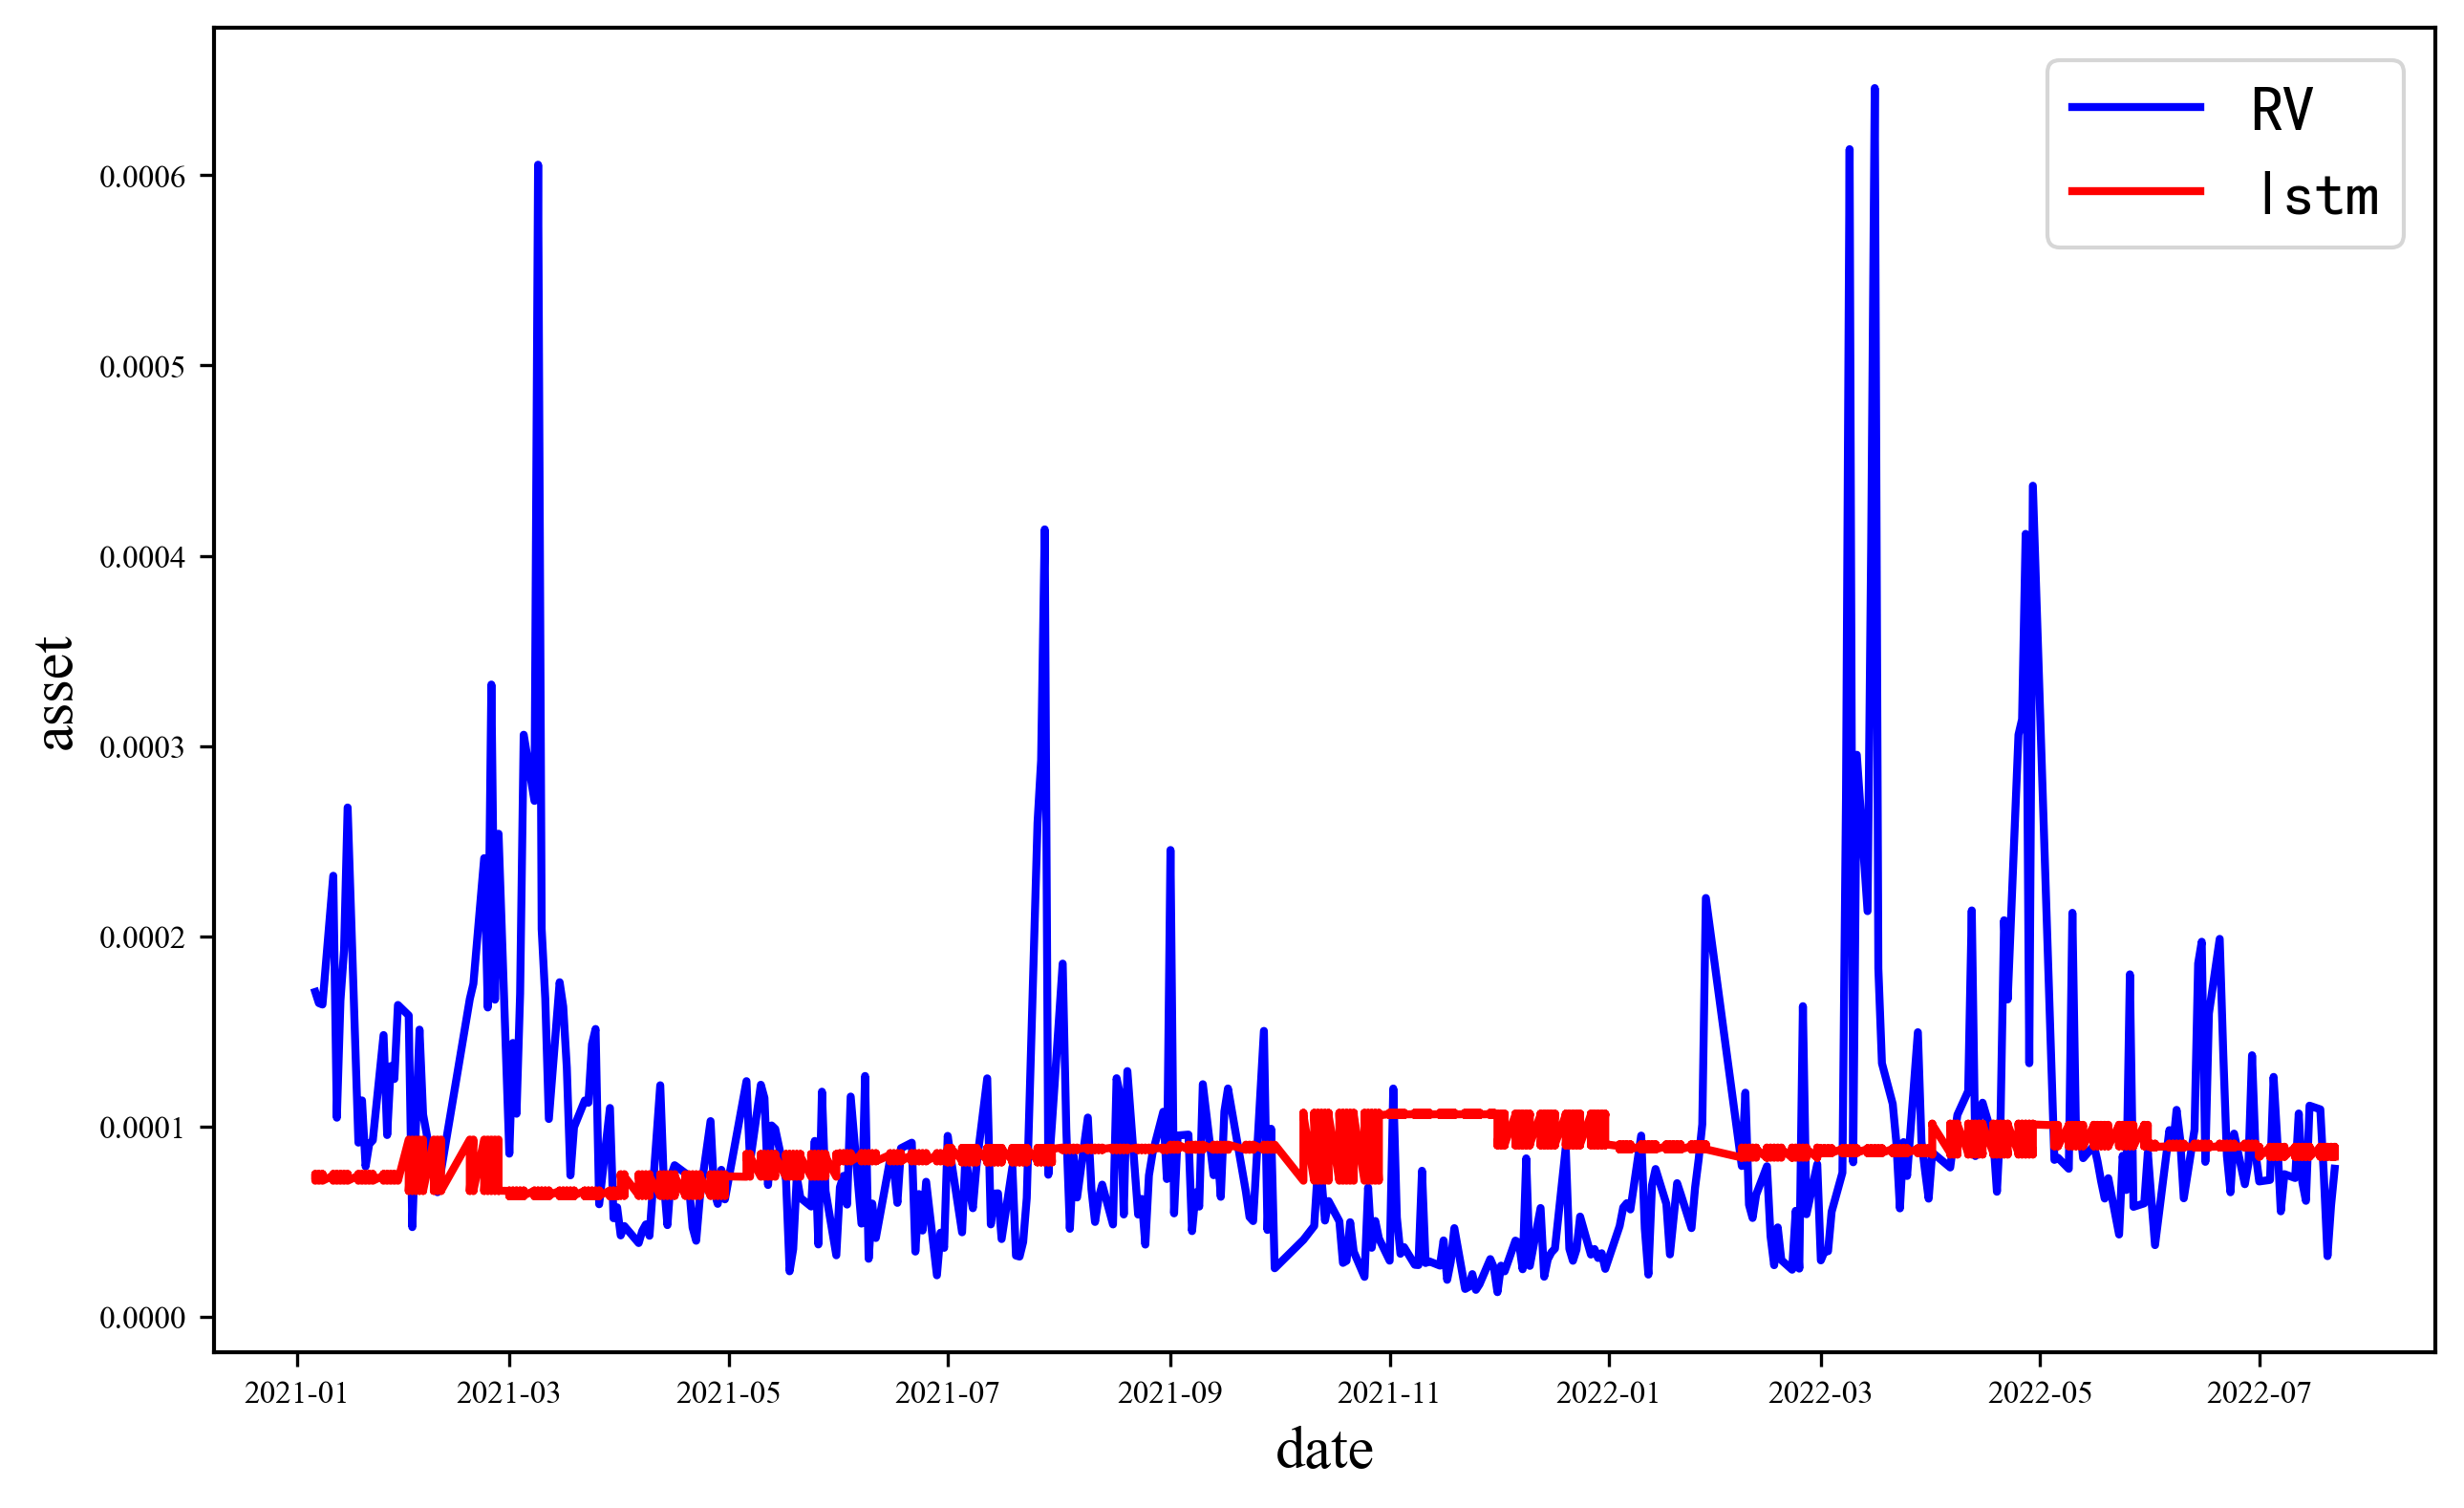

In [204]:

import  matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号
# plt.plot(data33.precision,data33.recall)
#设置输出的图片大小
figsize = 10,6
figure, ax = plt.subplots(figsize=figsize)
 
#在同一幅图片上画两条折线
A,=plt.plot(rv_test['date'],rv_test['RV'],'-b',label=u'RV',linewidth=2.0)
B,=plt.plot(rv_test['date'],rv_test['lstm'],'-r',label=u'garch',linewidth=2.0)

# B,=plt.subplot(122,data33.recall,data33.precision,'-b',label=u'il=0',linewidth=5.0)
# B,=plt.scatter(data33.recall,data33.precision,'-r')
plt.rcParams['axes.linewidth'] = 1  # 图框宽度
plt.rcParams['figure.dpi'] = 300  # plt.show显示分辨率
# font = {'family': 'serif',
#         'serif': 'Times New Roman',
#         'weight': 'normal',
#         'size': 10}
# plt.rc('font', **font)

#设置图例并且设置图例的字体及大小
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=8)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
 
#设置横纵坐标的名称以及对应字体格式
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 18,
}
plt.xlabel('date',font1)
plt.ylabel('asset',font1)
plt.legend(['RV','lstm'],fontsize=16)
#将文件保存至文件中并且画出图
# plt.savefig('./output/risk_OLS'+v_y+'_xgb_'+str(risk)+'_2022_2024.png')
plt.show()

In [538]:
mac=pd.read_csv('./中国宏观2024.csv')
mac
merge=pd.read_csv('./merge.csv')
v_x=[ '中国:固定资产投资完成额:累计同比',
       '中国:固定资产投资完成额:制造业:累计同比', '中国:工业增加值:金属制品业:累计同比', '中国:工业增加值:金属制品业:当月同比',
       '中国:工业增加值:通用设备制造业:当月同比', '中国:工业增加值:通用设备制造业:累计同比',
       '中国:工业增加值:专用设备制造业:当月同比', '中国:工业增加值:专用设备制造业:累计同比', 
       '中国:产量:工业锅炉:当月同比', '中国:产量:工业锅炉:累计同比', 
       '中国:产量:金属切削机床:累计同比', '中国:产量:金属切削机床:当月同比', 
       '中国:产量:汽车:当月同比', '中国:产量:汽车:累计同比','ppi_yoy','date_x']
merge[v_x]


,中国:固定资产投资完成额:累计同比,中国:固定资产投资完成额:制造业:累计同比,中国:工业增加值:金属制品业:累计同比,中国:工业增加值:金属制品业:当月同比,中国:工业增加值:通用设备制造业:当月同比,中国:工业增加值:通用设备制造业:累计同比,中国:工业增加值:专用设备制造业:当月同比,中国:工业增加值:专用设备制造业:累计同比,中国:产量:工业锅炉:当月同比,中国:产量:工业锅炉:累计同比,中国:产量:金属切削机床:累计同比,中国:产量:金属切削机床:当月同比,中国:产量:汽车:当月同比,中国:产量:汽车:累计同比,ppi_yoy,date_x
0,32.1,26.8,9.60,15.50,17.6,10.30,13.70,11.80,40.40,19.80,-15.90,24.40,100.8,43.2,-2.08,2009-11
1,30.4,26.6,10.01,13.58,18.1,10.97,20.27,12.96,3.30,18.40,-13.60,43.10,130.5,47.8,1.70,2009-12
2,30.4,26.6,10.01,13.58,18.1,10.97,20.27,12.96,24.43,24.43,39.62,39.62,144.3,144.3,4.32,2010-01
3,26.6,23.6,19.60,10.50,13.8,22.30,11.00,19.60,13.90,18.80,33.80,15.20,46.7,89.7,5.39,2010-02
4,26.4,25.8,18.90,17.60,22.3,22.30,19.60,19.20,12.10,15.20,23.50,18.20,51.5,73.2,5.91,2010-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,4.7,6.4,1.80,2.70,13.5,4.00,9.10,6.40,-10.60,4.30,-3.00,-1.90,59.8,4.3,-3.60,2023-04
152,4.0,6.0,1.30,-0.10,6.1,4.50,3.90,5.90,3.90,-1.20,-2.00,1.90,17.3,7.1,-4.60,2023-05
153,3.8,6.0,1.50,2.40,-0.2,3.60,3.40,5.50,-0.70,-1.20,-2.90,0.00,0.8,6.1,-5.40,2023-06
154,3.4,5.7,1.60,1.40,-1.4,2.80,1.50,4.90,-15.80,-3.20,-1.70,-2.10,-3.8,4.5,-4.40,2023-07


In [215]:
rv_train['date_x']=rv_train['JYR'].apply(lambda s:s[:7])
rv_train=rv_train.merge(merge[v_x],on='date_x')
rv_train

,JYR,RV,garch,gjrgarch,RV_s1,garch_s1,gjrgarch_s1,RV_s2,garch_s2,gjrgarch_s2,...,中国:工业增加值:通用设备制造业:累计同比,中国:工业增加值:专用设备制造业:当月同比,中国:工业增加值:专用设备制造业:累计同比,中国:产量:工业锅炉:当月同比,中国:产量:工业锅炉:累计同比,中国:产量:金属切削机床:累计同比,中国:产量:金属切削机床:当月同比,中国:产量:汽车:当月同比,中国:产量:汽车:累计同比,ppi_yoy
0,2016-08-26,0.000020,0.000038,0.000038,0.000053,0.000040,0.000041,0.000027,0.000038,0.000038,...,4.6,7.5,5.4,3.8,4.0,-2.9,10.9,24.7,10.0,-0.8
1,2016-08-29,0.000023,0.000036,0.000036,0.000020,0.000038,0.000038,0.000053,0.000040,0.000041,...,4.6,7.5,5.4,3.8,4.0,-2.9,10.9,24.7,10.0,-0.8
2,2016-08-30,0.000022,0.000034,0.000033,0.000023,0.000036,0.000036,0.000020,0.000038,0.000038,...,4.6,7.5,5.4,3.8,4.0,-2.9,10.9,24.7,10.0,-0.8
3,2016-08-31,0.000030,0.000035,0.000033,0.000022,0.000034,0.000033,0.000023,0.000036,0.000036,...,4.6,7.5,5.4,3.8,4.0,-2.9,10.9,24.7,10.0,-0.8
4,2016-09-01,0.000023,0.000040,0.000041,0.000030,0.000035,0.000033,0.000022,0.000034,0.000033,...,4.9,7.8,5.7,3.0,3.6,-2.4,14.1,31.5,12.3,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,2020-06-24,0.000032,0.000078,0.000072,0.000034,0.000083,0.000078,0.000042,0.000089,0.000085,...,-2.3,9.6,2.9,-18.2,-25.6,-7.7,15.4,20.4,-16.5,-3.0
852,2020-06-29,0.000032,0.000076,0.000073,0.000032,0.000078,0.000072,0.000034,0.000083,0.000078,...,-2.3,9.6,2.9,-18.2,-25.6,-7.7,15.4,20.4,-16.5,-3.0
853,2020-06-30,0.000028,0.000087,0.000081,0.000032,0.000076,0.000073,0.000032,0.000078,0.000072,...,-2.3,9.6,2.9,-18.2,-25.6,-7.7,15.4,20.4,-16.5,-3.0
854,2020-07-01,0.000090,0.000119,0.000109,0.000028,0.000087,0.000081,0.000032,0.000076,0.000073,...,-0.3,10.2,4.1,-17.3,-24.8,-9.1,14.7,26.8,-9.7,-2.4


In [179]:
d.rename(columns={d.columns[0]:'JYR'},inplace=True)

In [151]:
d

,JYR,early_warning_idx,consistency_idx,leading_idx,lagging_idx,boom_idx,boom_idx_yoy,boom_idx_mom,confidence_idx,confidence_idx_yoy,...,private_yoy,private_acc,collective_yoy,collective_acc,stock_cooperate_yoy,stock_cooperate_acc,joint_stock_yoy,joint_stock_acc,foreign_yoy,foreign_acc
0,2016-08-02,65.3,94.229677,99.140645,89.007742,110.158696,10.158696,2.586957,110.291304,10.291304,...,6.496774,8.390323,-4.090323,1.280645,6.729032,7.277419,6.400000,6.996774,6.683871,3.909677
1,2016-08-03,65.3,94.229355,99.151290,89.015484,110.196739,10.196739,2.617391,110.328261,10.328261,...,6.493548,8.380645,-4.080645,1.261290,6.558065,7.254839,6.400000,6.993548,6.667742,3.919355
2,2016-08-04,65.3,94.229032,99.161935,89.023226,110.234783,10.234783,2.647826,110.365217,10.365217,...,6.490323,8.370968,-4.070968,1.241935,6.387097,7.232258,6.400000,6.990323,6.651613,3.929032
3,2016-08-05,65.3,94.228710,99.172581,89.030968,110.272826,10.272826,2.678261,110.402174,10.402174,...,6.487097,8.361290,-4.061290,1.222581,6.216129,7.209677,6.400000,6.987097,6.635484,3.938710
4,2016-08-08,65.3,94.227742,99.204516,89.054194,110.386957,10.386957,2.769565,110.513043,10.513043,...,6.477419,8.332258,-4.032258,1.164516,5.703226,7.141935,6.400000,6.977419,6.587097,3.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,2021-08-26,70.7,99.109677,96.435484,97.930645,119.500000,19.500000,-4.391304,121.232609,21.232609,...,3.264516,13.409677,-1.400000,-1.200000,10.300000,1.000000,4.406452,12.232258,0.980645,11.929032
1266,2021-08-27,70.7,99.058065,96.412903,97.943871,119.450000,19.450000,-4.426087,121.177174,21.177174,...,3.187097,13.358065,-1.400000,-1.200000,10.300000,1.000000,4.338710,12.193548,0.883871,11.874194
1267,2021-08-30,70.7,98.903226,96.345161,97.983548,119.300000,19.300000,-4.530435,121.010870,21.010870,...,2.954839,13.203226,-1.400000,-1.200000,10.300000,1.000000,4.135484,12.077419,0.593548,11.709677
1268,2021-08-31,70.7,98.851613,96.322581,97.996774,119.250000,19.250000,-4.565217,120.955435,20.955435,...,2.877419,13.151613,-1.400000,-1.200000,10.300000,1.000000,4.067742,12.038710,0.496774,11.654839
